<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Dim_reduct_t_SNE_IsoMap_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# импорт
import numpy as np
from sklearn import datasets
# StandardScaler не нужен - работаем с картинками
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# данные
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
X.shape

(1083, 64)

In [41]:
# сколько классов - всего 6
y.max()

5

In [34]:
# просмотр примера данных
X[1][:5]

array([ 0.,  0.,  0., 12., 13.])

In [15]:
# масштабируем данные
scaler = MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [16]:
# IsoMap
iso = Isomap(n_neighbors=20,  # 2 соседей для расчета расстояния
             n_components=2)  # сжать до двух осей
# обучаем модель
iso.fit(X_std)
# тарнсформируем данные
X_iso = iso.transform(X_std)  

In [17]:
# t-SNE
tsne = TSNE(n_components=2)   # сжать до 2 осей
# обучение
tsne.fit(X_std)
# сжимаем данные, метода transform нет! не нужно 2 раза учить модель!
X_tsne = tsne.fit_transform(X_std)

In [18]:
# NMF
nmf = NMF(n_components=2)     # сжать до 2 осей
# обучение - не обучается если в данных отрицательные значения
# поэтому в том числе и использован минмаксскейлер
nmf.fit(X_std)
# трансформ
X_nmf = nmf.transform(X_std)

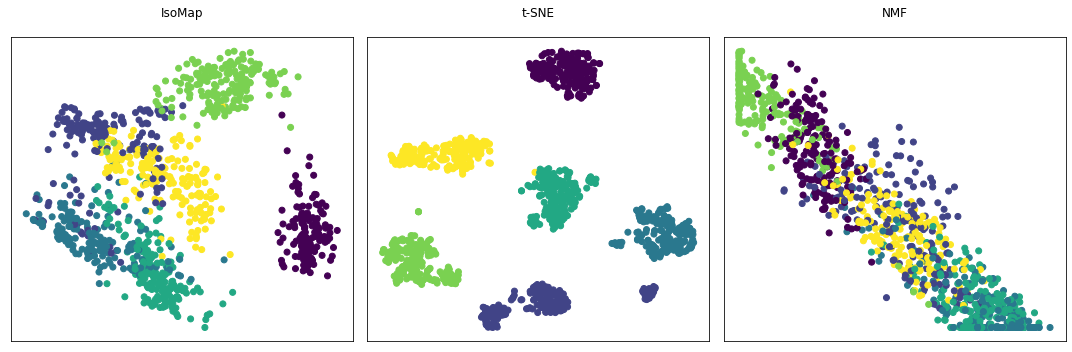

In [45]:
# печать
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y)
plt.xticks([])
plt.yticks([])
plt.title('IsoMap\n')

plt.subplot(132)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xticks([])
plt.yticks([])
plt.title('t-SNE\n')

plt.subplot(133)
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=y)
plt.xticks([])
plt.yticks([])
plt.title('NMF\n')

plt.tight_layout()
plt.show()

In [43]:
# tsne справился отлично, для nmf нужно больше измерений